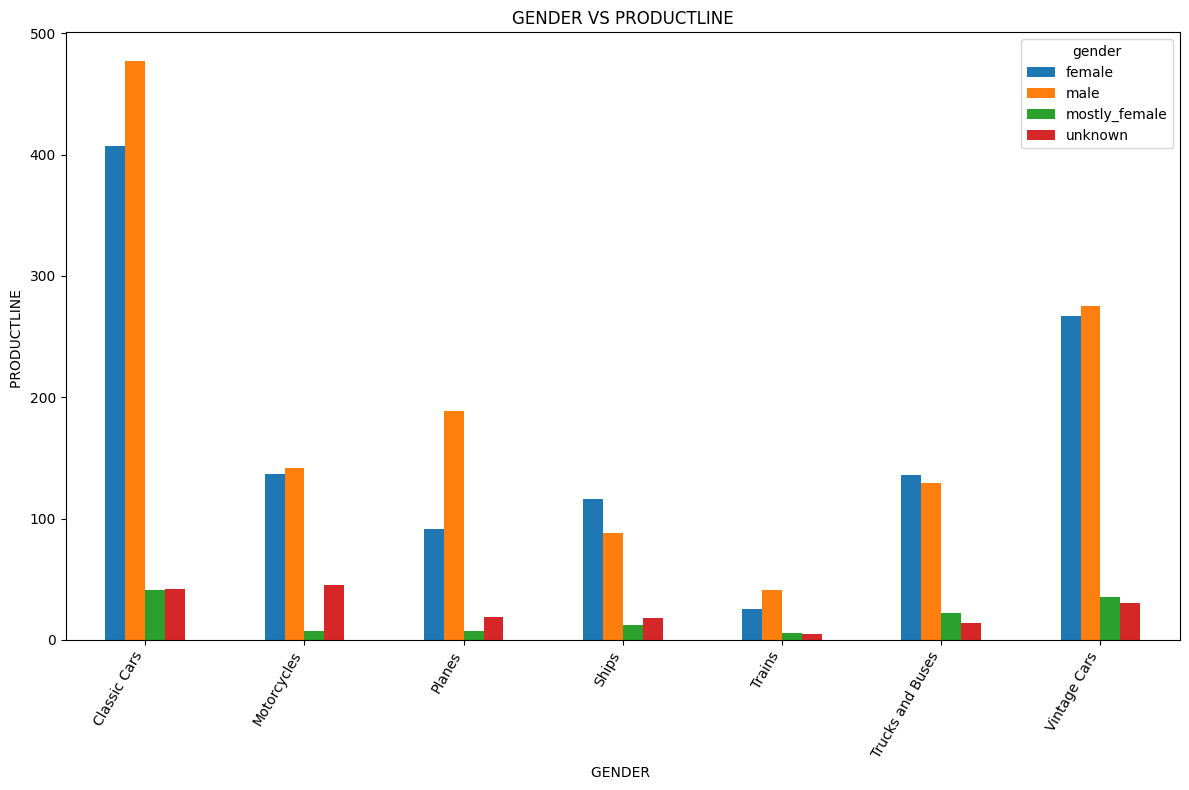

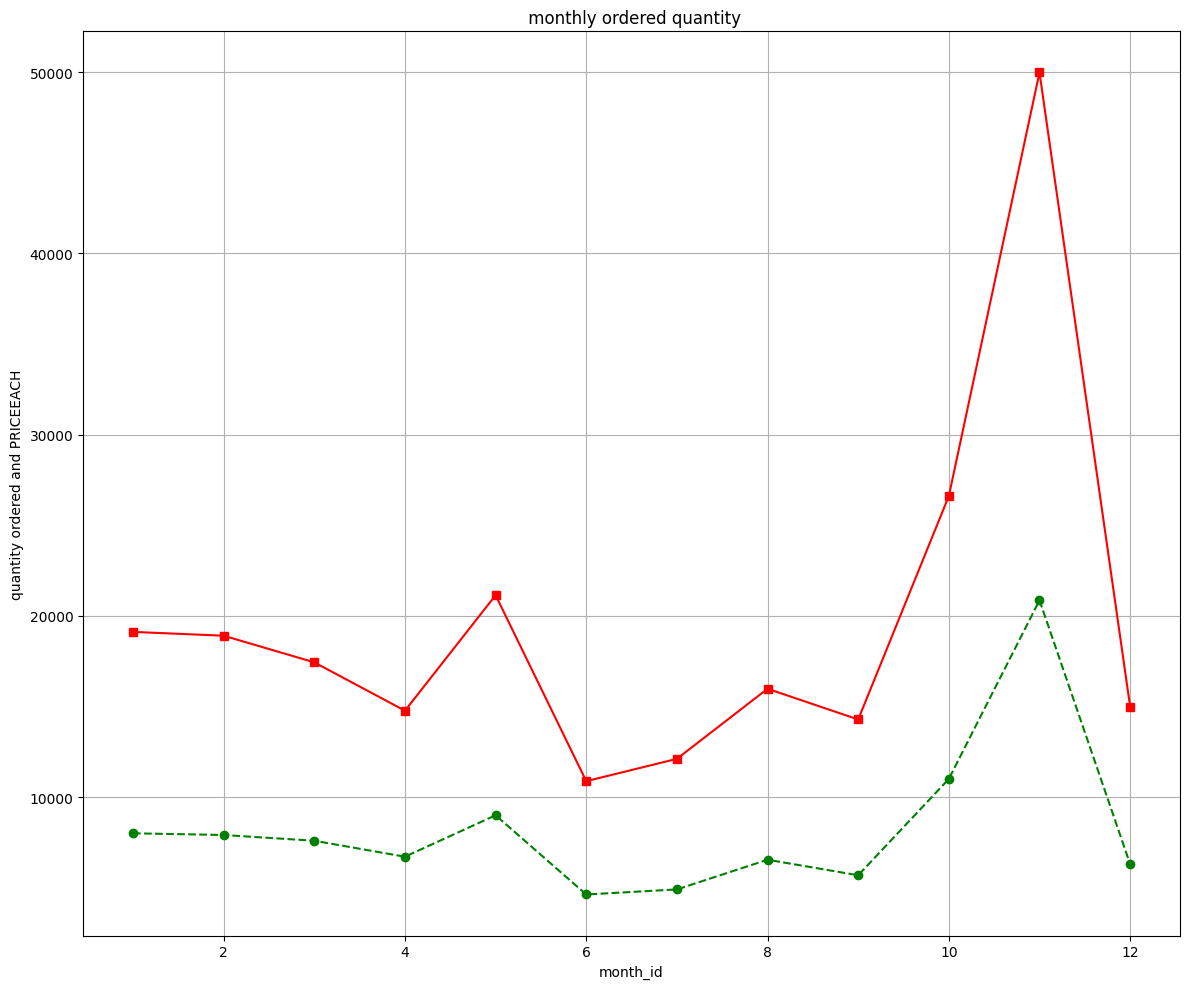

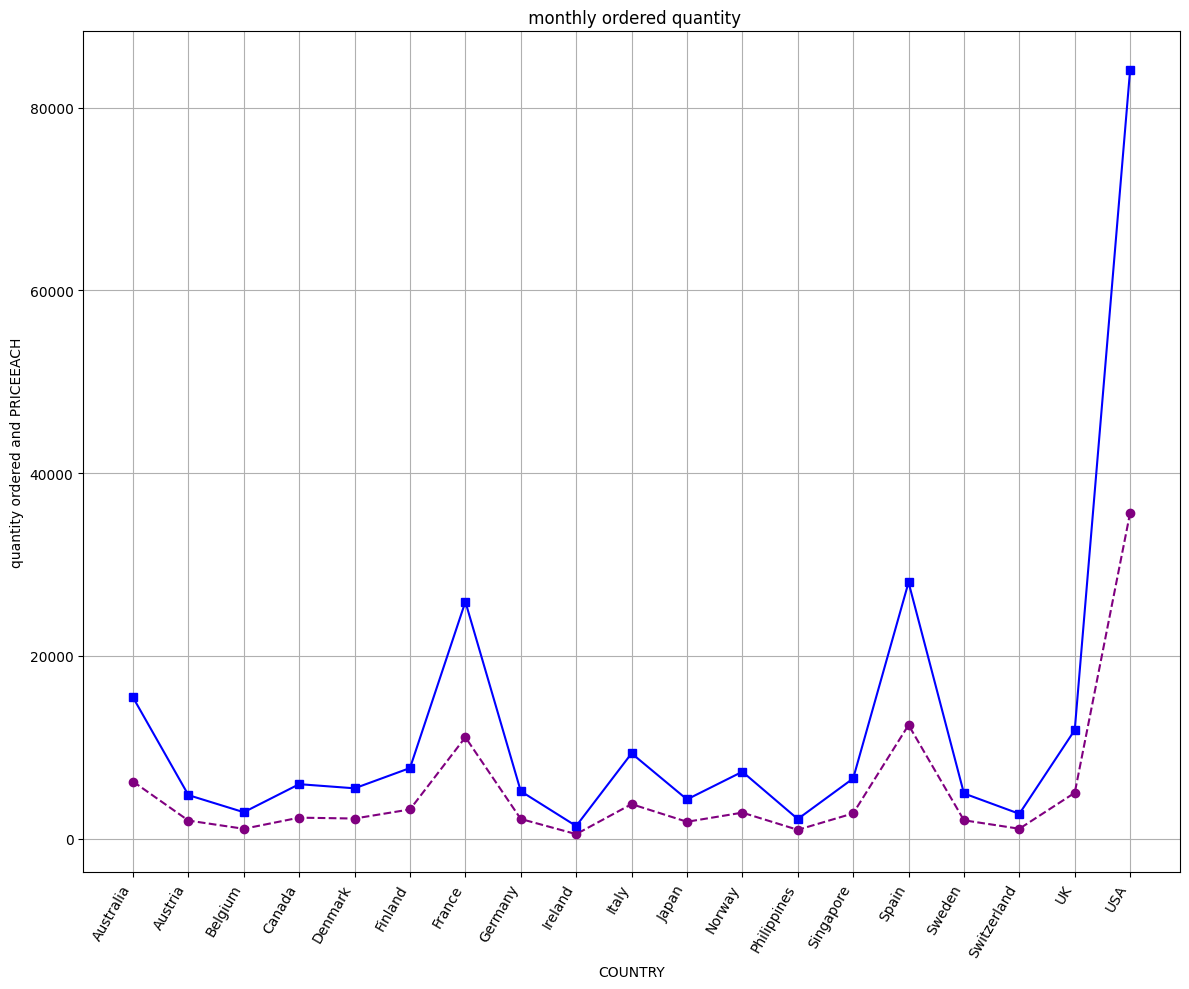

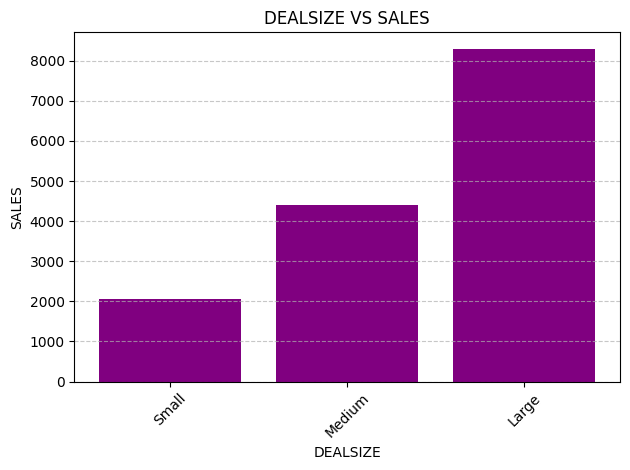

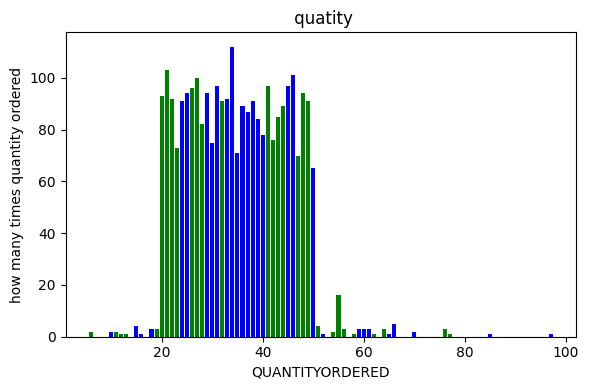

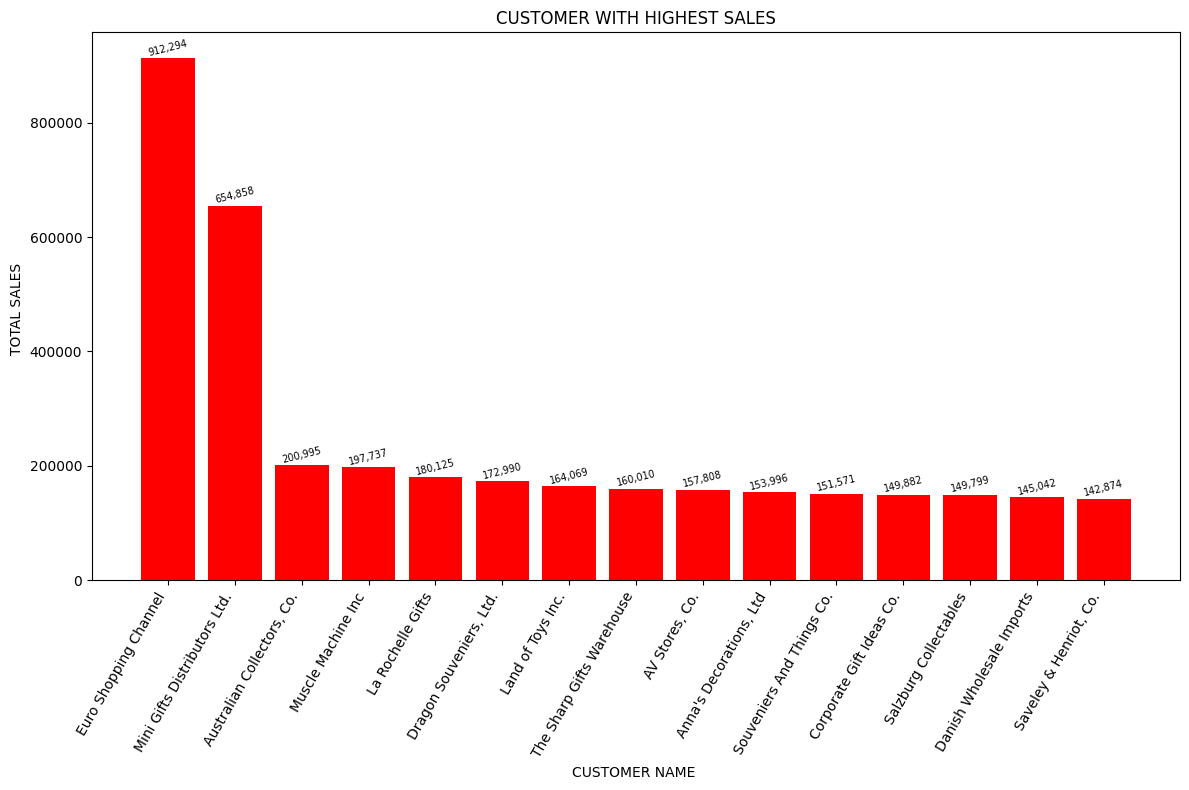

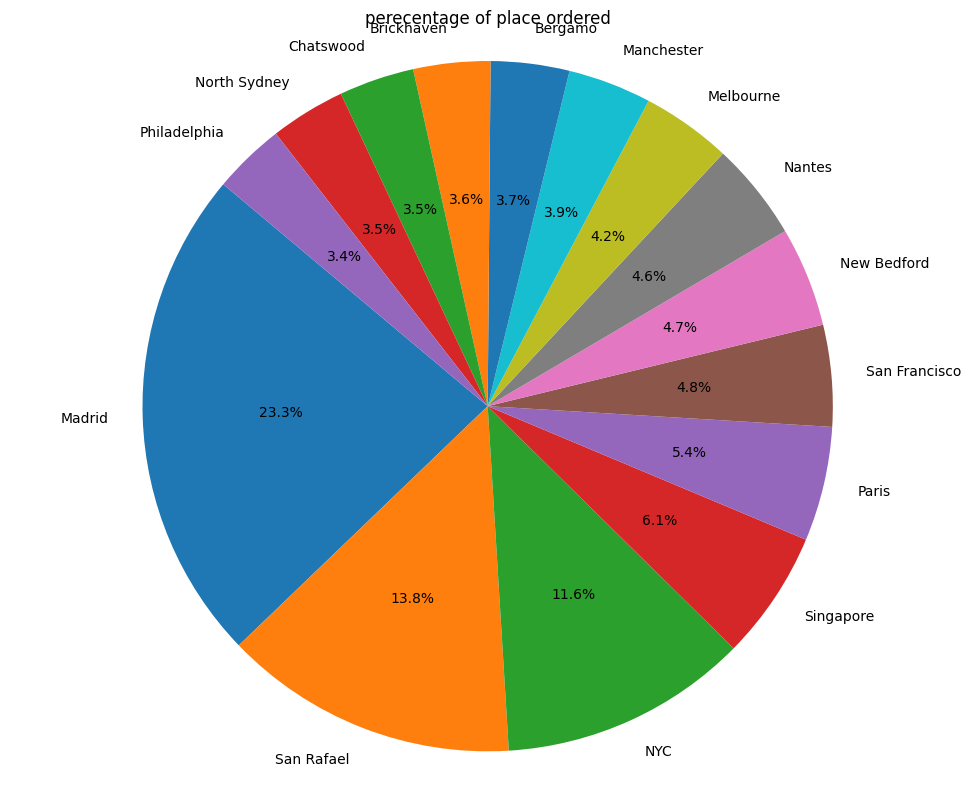

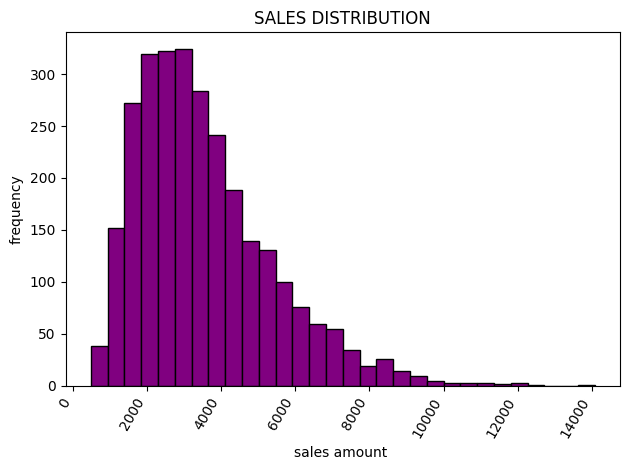

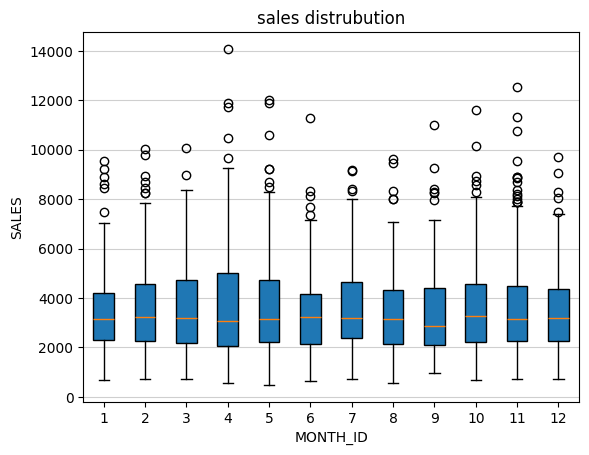

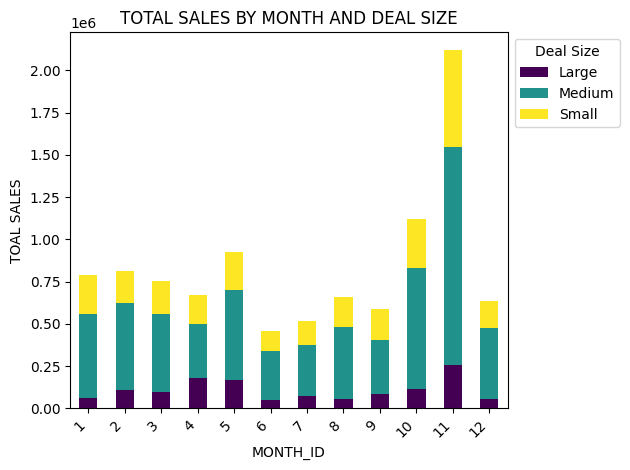

9

In [2]:
import pandas as pd 
import matplotlib . pyplot as plt 
import gender_guesser.detector as gender

df = pd.read_csv("sales_data_sample.csv",encoding="latin1")
#cleaning data
COLUMNS=['ORDERNUMBER','QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','SALES','ORDERDATE','STATUS','QTR_ID','MONTH_ID','YEAR_ID','PRODUCTLINE','MSRP','PRODUCTCODE','CUSTOMERNAME','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','COUNTRY','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','DEALSIZE']
numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude="number").columns
#MAKING A NEW COLUMN

 
#sample dataframe 


d = gender.Detector()

df["first_name"] = df["CONTACTFIRSTNAME"].apply(lambda x: x.split()[0])
df['gender'] = df["first_name"].apply(d.get_gender)

df["gender"] = df ["gender"].replace({
    "mostly_male": "male",
    "mostly_females":"females",
    "andy":"unknown"
      })

gender =(df[["CONTACTFIRSTNAME","first_name","gender"]])
df[numeric_columns]=df[numeric_columns].fillna(df[numeric_columns].mean())
for col in non_numeric_columns:
    df[col] = df[col].fillna("unknown")


#GENDER VS PRODUCTTLINE


quantity = df.groupby(["PRODUCTLINE", "gender"]).size().unstack(fill_value=0)

quantity.plot(kind ="bar",figsize=(12,8))

plt.title("GENDER VS PRODUCTLINE")
plt.xlabel("GENDER ")
plt.ylabel("PRODUCTLINE ")
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
plt.show()




#linechart

month_quantity = df.groupby("MONTH_ID")[["QUANTITYORDERED","PRICEEACH"]].sum()
plt.figure(figsize=(12,10))
plt.plot(month_quantity.index,month_quantity["QUANTITYORDERED"],marker="o",linestyle= "--",color= "green")
plt.plot(month_quantity.index,month_quantity["PRICEEACH"],marker="s",linestyle= "-",color= "red")

plt.title(" monthly ordered quantity")
plt.xlabel("month_id")
plt.ylabel("quantity ordered and PRICEEACH")
plt.grid()
plt.tight_layout()
plt.show()

#LINE GRAPH

month_quantity = df.groupby("COUNTRY")[["QUANTITYORDERED","PRICEEACH"]].sum()
plt.figure(figsize=(12,10))
plt.plot(month_quantity.index,month_quantity["QUANTITYORDERED"],marker="o",linestyle= "--",color= "purple")
plt.plot(month_quantity.index,month_quantity["PRICEEACH"],marker="s",linestyle= "-",color= "blue")

plt.title(" monthly ordered quantity")
plt.xlabel("COUNTRY")
plt.ylabel("quantity ordered and PRICEEACH")
plt.grid()
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
plt.show()

#BAR CHART 

DEAL_SIZE = df.groupby("DEALSIZE")["SALES"].mean().reindex(["Small","Medium","Large"])
plt.Figure(figsize=(10,8))
plt.bar(DEAL_SIZE.index,DEAL_SIZE.values,color = ["purple"])
plt.title("DEALSIZE VS SALES")
plt.xlabel("DEALSIZE")
plt.ylabel("SALES")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#bar chart

type_counts = df['QUANTITYORDERED'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['blue','green'])
plt.title(" quatity")
plt.xlabel("QUANTITYORDERED")
plt.ylabel("how many times quantity ordered")
plt.tight_layout()
plt.show()

#bar chart 

quantity = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False)
top_customer = quantity.head(15)
plt.figure(figsize=(12,8))
bars = plt.bar(top_customer.index,top_customer.values,color = ["red"])
plt.title("CUSTOMER WITH HIGHEST SALES")
plt.xlabel("CUSTOMER NAME ")
plt.ylabel("TOTAL SALES ")
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=7, rotation=14)

        
plt.show()




#pie chart 

CITY_COUNTS = df["CITY"].value_counts().head(15)
plt.figure(figsize=(10,8))
plt.pie(CITY_COUNTS,labels=CITY_COUNTS.index,autopct='%1.1f%%',startangle=140)
plt.title("perecentage of place ordered")
plt.axis("equal")
plt.tight_layout()
plt.show()

#histogram chart 

plt.Figure(figsize=(8,6))
plt.hist(df["SALES"], bins=30,color="purple",edgecolor = "black")
plt.title("SALES DISTRIBUTION")
plt.xlabel("sales amount ")
plt.ylabel("frequency")
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
plt.show()

#BOX CURVE
MONTH_ID = sorted(df["MONTH_ID"].unique())
sale_data = [df[df["MONTH_ID"]== month]["SALES"]  for month in MONTH_ID]

plt.Figure(figsize=(10,6))
plt.boxplot(sale_data,label=MONTH_ID,patch_artist=True)
plt.xlabel("MONTH_ID")
plt.ylabel("SALES")
plt.title("sales distrubution")
plt.grid(axis="y",linestyle="-",alpha = 0.6)
plt.show()
#stacked chart
stack = df.groupby(["MONTH_ID","DEALSIZE"])["SALES"].sum().unstack()
stack=stack.sort_index()
plt.Figure(figsize=(10,6))
stack.plot(kind = "bar", stacked = True,ax = plt.gca(),cmap="viridis")
plt.title('TOTAL SALES BY MONTH AND DEAL SIZE')
plt.xlabel('MONTH_ID')
plt.ylabel('TOAL SALES')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Deal Size', bbox_to_anchor=(1,1), loc='upper left') 
plt.tight_layout()
plt.show()









9